# L’assurance-maladie obligatoire suisse dans l’impasse

Celâl Güney [](https://orcid.org/0009-0008-2601-030X) (unige)  
Gaia Valenti (unige)  
February 26, 2026

# Annexe

## Stratégie empirique pour les modèles de la section 4

La spécification des modèles présentés dans la section 4 a pour objectif de reproduire une analyse néoréaliste des facteurs influençant les attentes sociales. Les variables dépendantes sont binarisées afin de conduire des estimations de modèles logistiques binaires en utilisant l’estimation du maximum de vraisemblance. La variable d’opinion sur l’augmentation de la franchise minimale de l’assurance-maladie de base est construite sur une échelle Likert de 1 (fortement contre) à 5 (fortement pour). Nous avons créé une variable dichotomique pour les deux premières catégories (fortement contre et contre). Pour le choix du vote pour l’initiative d’allègement des primes, nous avons dichotomisé en binarisant le vote en faveur de l’initiative. Les principales variables explicatives que nous avons considérées sont un indice de classe sociale mesurée par la classification européenne des groupes socioéconomiques (ESEG), le revenu mensuel brut du ménage, à partir duquel nous calculons le niveau de revenu par décile, ainsi qu’une batterie d’indicateurs socio-démographiques (âge, langue, cantons, genre) et idéologiques (auto-positionnement gauche-droite, vote, probabilité de vote pour les principaux partis politiques, opinions sur des sujets économiques et identitaires). Pour chacune de nos deux variables dépendantes, nous avons procédé à une sélection de modèle pas à pas descendante avec le critère d’information d’Akaike (AIC). Cette procédure a abouti au modèle suivant pour l’opposition à l’augmentation de la franchise minimale:

$$
P(y_i = 1) = logit^{-1}(\beta_0 + \beta_{d}D_i + \beta X_i + \gamma_p P_i + \eta_o O_i + \epsilon_i) 
$$ {#eq-1}

Avec $P(y_i = 1)$ la probabilité de l’individu $i$ d’être contre l’augmentation de la franchise minimale, $D_i$ le niveau de décile auquel appartient l’individu $i$, $X_i$ un vecteur de caractéristiques individuelles socio-démographique (âge, genre, langue), $P_i$ un vecteur de variable sur la probabilité de voter pour certains partis politiques suisses (Le Centre, le Parti Socialiste, les Verts et les Verts Libéraux) sur une échelle de 0 à 10, et $O_i$ l’opinion sur une série d’enjeux comme l’intégration européenne, le salaire minimum ou encore les dépenses sociales. $\epsilon_i$ est le terme d’erreur. De manière surprenante, la variable pour les groupes socio-économiques ESEG n’a pas été retenue par la procédure de sélection, ce qui implique que la classe sociale telle que mesurée par l’indice ESEG ne semble pas jouer un rôle déterminant par rapport au niveau de revenu et aux autres variables de contrôle Comme le schéma de classe ESEG est une variable importante pour notre analyse, nous considérons quand même les résultats d’une régression simple de nos deux variables dépendantes sur les catégories socio-professionnelles ESEG (résultats disponibles dans l’annexe). Encore plus étonnant, la variable contrôlant pour les cantons n’a pas non plus été retenue, ce qui suggère que l’effet d’appartenance à un canton est négligeable. Le coefficient de corrélation interclasse (ICC) calculé à partir d’un modèle multiniveau avec les cantons en tant que niveau confirme que les variations entre cantons sont faibles (voir annexe). Le modèle pour le vote en faveur de l’initiative pour l’allègement des primes prend une forme similaire à (1), avec quelques différences au niveau des variables retenues car certaines d’entre elles n’étaient pas disponible dans la quatrième vague. Comme pour le premier modèle, le schéma de classe ESEG n’a pas été retenu par la procédure de sélection, ni le canton de résidence.

In [ ]:
rm(list = ls())

options(scipen = 100, digits = 4)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Attachement du package : 'sjPlot'

L'objet suivant est masqué depuis 'package:ggplot2':

    set_theme

e.g.:
  dat <- vroom(...)
  problems(dat)

Rows: 3141 Columns: 245
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr  (17): SECURITYID, REASON1ACC1, REASON2ACC1, REASON1DEN1, REASON2DEN1, R...
dbl (215): CODERESP, BIRTHYEARR, CONTROL1, S11, POLINT, PART, NONVOTE_01, NO...
lgl  (13): CONTROL3, CONTROL3@, REASON2ACC1_04, REASON2DEN1_04, REASON2DEN1_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

In [ ]:
library(readxl)
library(tidyverse)

data_final_am <- read_excel("data_final_am.xlsx", 
    sheet = "graphique 1") %>% 
  pivot_longer(
    cols = 2:15,
    names_to = "variable",
    values_to = "value"
  )

In [ ]:
plot1 <- 
data_final_am %>% 
  filter(variable %in% c("indice_cout_sante_hab100", "salaire_reel100", "salaire_nominal100", "pib_reel_100", "ipam_total")) %>% 
  ggplot(aes(x = Year, y = value, color = variable, linetype = variable))+
  geom_line(size = 1)+
  labs(y = "1999 = 100",
       x = "",
       title = "Évolution de l'indice des primes d'assurance-maladie")+
  theme_minimal()+
  scale_color_discrete(labels = c("Coûts de la santé par habitants",
                                  "Indice des primes d'assurance-maladie",
                                  "PIB réel",
                                  "Indice des salaires nominaux",
                                  "Indice des salaires réels"))+
  scale_linetype_discrete(labels = c("Coûts de la santé par habitants",
                                    "Indice des primes d'assurance-maladie",
                                     "PIB réel",
                                     "Indice des salaires nominaux",
                                     "Indice des salaires réels"))+
  theme(legend.position = "bottom",
        legend.title = element_blank(),
        text = element_text(size = 11.6))+
  guides(color = guide_legend(nrow = 2)) 

#plot1

#ggsave("plot_ipam.jpg", plot1)

In [ ]:
#| echo: false
#| message: false
#| warning: false


library(viridis)

Le chargement a nécessité le package : viridisLite


Attachement du package : 'cowplot'

Les objets suivants sont masqués depuis 'package:sjPlot':

    plot_grid, save_plot

L'objet suivant est masqué depuis 'package:lubridate':

    stamp


Attachement du package : 'gridExtra'

L'objet suivant est masqué depuis 'package:dplyr':

    combine

In [ ]:
#| echo: false
#| message: false
#| warning: false
#| label: fig-financement
#| fig-cap: "Financement du système de santé suisse selon la source. Source: OFS"


library(readr)
library(ggtext)

Rows: 29 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (10): Label_FR, État: paiements pour des prestations, État: subventions ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

ℹ Please use `linewidth` instead.

In [ ]:
library(readxl)
subventions <- read_excel("data_final_am.xlsx", 
    sheet = "graphique3") %>% 
  pivot_longer(cols = -1)

plot_subvention1 <- 
subventions %>% 
  filter(
    name %in% c("Subventions par ménage (francs)", "Taux de bénéficiaires (%)")
  ) %>% 
  ggplot(aes(x = annee, y = value))+
  geom_line()+
  theme_minimal()+
  facet_wrap(~name, scales = "free_y")+
  theme(text = element_text(size = 16))+
  labs(x = "", y = "")

plot_subventions2 <- 
subventions %>% 
  filter(name %in% c("Subventions selon la LAMal par ménage (en francs)", "Primes moyennes par assuré")) %>% 
  ggplot(aes(x = annee, y = value, color = name))+
  geom_line()+
  theme_minimal()+
  theme(legend.position = "bottom",
        legend.title = element_blank())+
  labs(x = "", y = "1996 = 100",
       subtitle = "Évolution des subventions et des primes")+
  theme(text = element_text(size = 16))

plot2 <- 
dep_quantiles %>% 
  ggplot(aes(x = annee, y = value, fill = name))+
  geom_col(position = "dodge", color = "white")+
  theme_minimal()+
  labs(x = "",
       y = "Pourcentage du revenu disponible brut",
       title = "Dépense des ménages suisses pour les primes de l'assurance-maladie de base")+
  scale_fill_paletteer_d("nationalparkcolors::Acadia",
                         name = "Quintile")+
  theme(text = element_text(size = 16))

#plot_subventions3 <- grid.arrange(arrangeGrob(plot_subvention1, plot_subventions2, ncol = 1), plot2, ncol = 2)

#ggsave("graph_subventions.png", plot_subventions3, width = 60, height = 30, units = "cm")

#plot_subventions3

In [ ]:
library(tidyverse)
library(readr)
library(readxl)

votations2024 <- read_excel("data/votations2024.xlsx", 
    col_types = c("numeric", "text", "numeric", 
        "numeric"))

pour un frein aux coûts - Proportion de "oui"'

d’allègement des primes - Proportion de "oui"'

Communes (politique) 01.03.2024'

In [ ]:
#| echo: false
#| message: false
#| warning: false


library(BFS)

Linking to GEOS 3.13.1, GDAL 3.11.4, PROJ 9.7.0; sf_use_s2() is TRUE

Warning in classInt::classIntervals(.data[[var]], n = dim, style = style): var
has missing values, omitted in finding classes

In [ ]:
library(haven)


Attachement du package : 'sjlabelled'

Les objets suivants sont masqués depuis 'package:haven':

    as_factor, read_sas, read_spss, read_stata, write_sas, zap_labels

L'objet suivant est masqué depuis 'package:forcats':

    as_factor

L'objet suivant est masqué depuis 'package:dplyr':

    as_label

L'objet suivant est masqué depuis 'package:ggplot2':

    as_label

! ISCO variable is not a character. Beware that numeric ISCO variables possibly contain lost data. See https://cimentadaj.github.io/DIGCLASS/articles/repairing_isco_input.html for more details. Converting to a character vector.

ℹ ISCO variable has occupations with digits less than 4. Converting to 4 digits.

• Converted `100` to `0100`

• Converted `200` to `0200`

• Converted `300` to `0300`

In [ ]:
library(MASS)


Attachement du package : 'MASS'

L'objet suivant est masqué depuis 'package:dplyr':

    select

In [ ]:
avg_slopes_tbl_model1 <- 
model1_step2 %>% 
  avg_slopes()

avg_slopes_tbl_model1 <- 
  avg_slopes_tbl_model1 %>% 
  mutate(
    stars = case_when(
      p.value <= 0.001 ~ "***",
      p.value <= 0.01 ~ "**",
      p.value <= 0.05 ~ "*",
      p.value <= 0.1 ~ "+",
      p.value > 0.1 ~ ""
    )
  )

library(gt)


Attachement du package : 'gt'

L'objet suivant est masqué depuis 'package:cowplot':

    as_gtable

In [ ]:
library(haven)
library(tidyverse)
library(marginaleffects)
library(sjlabelled)
library(DIGCLASS)


# function to recode party satisfaction variables to put "don't know" as middle value

recode_party_satisfaction = function(var){
  new_var = case_when(
    var == 1 ~ 1,
    var == 2 ~ 2, 
    var == 8 ~ 3, 
    var == 3 ~ 4,
    var == 4 ~ 5
  )
}


selects2023panelW4 <-  read_sav("data/selects2023panelW4/data/2626_Selects2023_Panel_Data_v2.0.sav")

selects2023panelW4$isco08 = selects2023panelW4$W1_4_f21601_2dig*100

selects2023panelW4_2 = selects2023panelW4  %>% 
  rename(
    vote_choice = "W4_f10851main6",
    feelings_udc = 'W4_f14177a',
    feelings_ps = 'W4_f14177b',
    feelings_centre = 'W4_f14177c',
    feelings_plr = 'W4_f14177d',
    feelings_verts = 'W4_f14177e',
    feelings_vertslib = 'W4_f14177f',
    
    op_gender_equality = 'W4_f15475',
    op_state_intervention = 'W4_f15435', # 5 = for more competition
    op_2many_worries_abt_env_vs_prices = 'W4_f15478',
    op_min_wage = 'W4_f15815', # 4 = strongly in favor
    op_incr_retirement_age = 'W4_f15811',
    op_foreigners_votingrights = 'W4_f15816',
    op_rights_samesex_couples = 'W4_f15817'
    
    
    
  ) %>% 
  mutate(
    income = case_when(
  W4_f28910 == 1  ~ (0+2000)/2,
  W4_f28910 == 2  ~ (2001+3000)/2,
  W4_f28910 == 3  ~ (3001+4000)/2,
  W4_f28910 == 4  ~ (4001+5000)/2,
  W4_f28910 == 5  ~ (5001+6000)/2,
  W4_f28910 == 6  ~ (6001+7000)/2,
  W4_f28910 == 7  ~ (7001+8000)/2,
  W4_f28910 == 8  ~ (8001+9000)/2,
  W4_f28910 == 9  ~ (9001+10000)/2,
  W4_f28910 == 10 ~ (10001+11000)/2,
  W4_f28910 == 11 ~ (11001+12000)/2,
  W4_f28910 == 12 ~ (12001+13000)/2,
  W4_f28910 == 13 ~ (13001+14000)/2,
  W4_f28910 == 14 ~ (14001+15000)/2,
  W4_f28910 == 15 ~ (15001+16000)/2,
  W4_f28910 == 16 ~ (16001+17000)/2,
  W4_f28910 == 17 ~ (17001+18000)/2,
  W4_f28910 == 18 ~ (18001+19000)/2,
  W4_f28910 == 19 ~ (19001+20000)/2,
  W4_f28910 == 20 ~ 20001         
),

language = factor(as_label(W4_langint)),
gender = factor(as_label(W4_sex)),

rec_satisf_plr = recode_party_satisfaction(W4_f13743a),
rec_satisf_centre = recode_party_satisfaction(W4_f13743b),
rec_satisf_ps = recode_party_satisfaction(W4_f13743c),
rec_satisf_udc = recode_party_satisfaction(W4_f13743d),
rec_satisf_verts = recode_party_satisfaction(W4_f13743e),

income_decile = ntile(income, n = 10),
income_adjusted = income/sqrt(W4_f20500), # W4_f20500 = household size, including R
income_adj_decile = ntile(income_adjusted, n = 10),

lr = if_else(W4_f15200 == 98 | is.na(W4_f15200), NA, W4_f15200),

education_ISCED = case_when(
  W4_f21310rec %in% c(1, 2) ~ 1,  # No education, Primary = ISCED 1
  W4_f21310rec == 3        ~ 2,  # Secondary school = ISCED 2
  W4_f21310rec %in% c(4,5) ~ 3,  # Basic vocational training, apprenticeship = ISC4D 3
  W4_f21310rec %in% c(6,7,8) ~ 4, # Upper secondary specialized, tra4e, vocational = ISCED 4 
  W4_f21310rec == 9 ~ 5,  # Matu = ISCED 5
  W4_f21310rec == 10 ~ 5,  # Higher vocational education with federal dip4oma = ISCED 5
  W4_f21310rec == 11 ~ 6,  # College of higher education = ISCED 6
  W4_f21310rec == 12 ~ 6,  # Uni of applied sciences = ISCED 6 (Ba4helor level)
  W4_f21310rec == 13 ~ 7,  # University / Federal Institute of Tec4nology = ISCED 7 (Master)
  W4_f21310rec == 14 ~ NA   # other
),

public_sector = if_else(W1_4_f21700 == 2, 1, 0),
canton = as_character(W4_canton_sample),
langue = relevel(factor(as_character(W4_langint)), ref = "German"),

#isco08_4d = isco08_swap(W1_ISCO08prof_2dig, from = 2, to = 3),

main_activity = case_when(
  
  # comme il s'agit de la 4eme vague, la question si la situation de travail a changé doit etre prise en compte, si W4_f21300 == 0, la situation n'a pas changé depuis vague 1 (W1)
  W4_f21300 == 0 & W1_f21400 %in% c(1, 2, 7) ~ 1, # working
  W4_f21300 == 0 & W1_f21400 %in% c(3) ~ 2, # in training/education
  W4_f21300 == 0 & W1_f21400 %in% c(6) ~ 3, # disability
  W4_f21300 == 0 & W1_f21400 %in% c(4, 8) ~ 4, # no paid work
  W4_f21300 == 0 & W1_f21400 %in% c(5) ~ 5, # retired
  
  W4_f21300 == 1 & W4_f21400 %in% c(1, 2, 7) ~ 1, # working
  W4_f21300 == 1 & W4_f21400 %in% c(3) ~ 2, # in training/education
  W4_f21300 == 1 & W4_f21400 %in% c(6) ~ 3, # disability
  W4_f21300 == 1 & W4_f21400 %in% c(4, 8) ~ 4, # no paid work
  W4_f21300 == 1 & W4_f21400 %in% c(5) ~ 5 # retired
  
),

# Prise en compte du changement depuis W1, comme pour main_activity
work_status = case_when(
  W4_f21300 == 0 & W1_f21500 == 4 ~ 1, # self-employed
  W4_f21300 == 0 & W1_f21500 %in% c(1, 2, 3) ~ 0, # employee
  W4_f21300 == 0 & is.na(W1_f21500) ~ 2, # not employed
  
  W4_f21300 == 1 & W4_f21500 == 4 ~ 1, # self-employed
  W4_f21300 == 1 & W4_f21500 %in% c(1, 2, 3) ~ 0, # employee
  W4_f21300 == 1 & is.na(W4_f21500) ~ 2 # not employed
),


main_activity2 = case_when(
  
  W1_4_f21400 %in% c(1, 2, 7) ~ 1, # working
  W1_4_f21400 %in% c(3) ~ 2, # in training/education
  W1_4_f21400 %in% c(6) ~ 3, # disability
  W1_4_f21400 %in% c(4, 8) ~ 4, # no paid work
  W1_4_f21400 %in% c(5) ~ 5 # retired
  
),

work_status2 = case_when(
  W1_4_f21500 == 4 ~ 1, # self-employed
  W1_4_f21500 %in% c(1, 2, 3) ~ 0, # employee
  is.na(W1_4_f21500) ~ 2 # not employed
),


eseg = isco08_to_eseg(isco08, work_status = work_status2, main_activity = main_activity2, age = W4_age, to_factor = FALSE, type = "two-digit", label = FALSE),

yes_premium_initiative = if_else(W4_f10771a == 1, 1,
                                 if_else(is.na(W4_f10771a), NA, 0)),

yes_biodiversity_initiative =  if_else(W4_f10751a == 1, 1,
                                 if_else(is.na(W4_f10751a), NA, 0)),

yes_pension_reform = if_else(W4_f10751b == 1, 1,
                                 if_else(is.na(W4_f10751b), NA, 0)),

yes_13th_pension_payment = if_else(W4_f10791 == 1, 1,
                                 if_else(is.na(W4_f10791), NA, 0)),

  
)

! ISCO variable is not a character. Beware that numeric ISCO variables possibly contain lost data. See https://cimentadaj.github.io/DIGCLASS/articles/repairing_isco_input.html for more details. Converting to a character vector.

ℹ ISCO variable has occupations with digits less than 4. Converting to 4 digits.

• Converted `200` to `0200`

• Converted `300` to `0300`

• Converted `100` to `0100`

! ISCO variable is not a character. Beware that numeric ISCO variables possibly contain lost data. See https://cimentadaj.github.io/DIGCLASS/articles/repairing_isco_input.html for more details. Converting to a character vector.

ℹ ISCO variable has occupations with digits less than 4. Converting to 4 digits.

• Converted `200` to `0200`

• Converted `300` to `0300`

• Converted `100` to `0100`

In [ ]:
library(lme4)

Le chargement a nécessité le package : Matrix


Attachement du package : 'Matrix'

Les objets suivants sont masqués depuis 'package:tidyr':

    expand, pack, unpack


Attachement du package : 'lme4'

L'objet suivant est masqué depuis 'package:marginaleffects':

    refit

In [ ]:
library(performance)
library(gt)

model2_performance = model_performance(best_model_glm2)

avg_slopes_tbl_bestmodelW4 <- 
  avg_slopes_tbl_bestmodelW4 %>% 
  mutate(
    stars = case_when(
      p.value <= 0.001 ~ "***",
      p.value <= 0.01 ~ "**",
      p.value <= 0.05 ~ "*",
      p.value <= 0.1 ~ "+",
      p.value > 0.1 ~ ""
    )
  )


tbl_model2 <- 
avg_slopes_tbl_bestmodelW4 %>% 
  gt() %>% 
  fmt_number(
    decimals = 4
  ) %>% 
  cols_merge(columns = c("estimate", "std.error", "stars"),
             pattern = "<<{1}{3}<br>({2})>>") %>% 
  tab_header(
    title = "Résultats: vote sur l'initiative d'allègement des primes",
    subtitle = "Effets et contrastes marginaux moyens prédits par le modèle"
  ) %>% 
  tab_source_note(
    source_note = md(
      paste0(
        "**R² Tjur** = ", round(model2_performance$R2, 3), "<br>",
        "**RMSE** = ", round(model2_performance$RMSE, 3), "<br>",
        "**N** = ", nrow(data_model_fit)
      )
    )
  ) %>% 
  tab_source_note(
    source_note = "+ p < 0.10, * p < 0.05, ** p < 0.01, *** p < 0.01"
  ) %>% 
  text_replace(
    pattern = "^W4_age$",
    replacement = "Âge"
  ) %>% 
  text_replace(
    pattern = "^eseg10$",
    replacement = "Catégorie socio-professionnelle"
  ) %>% 
  text_replace(
    pattern = "^gender$",
    replacement = "Genre"
  ) %>% 
  text_replace(
    pattern = "^income_adj_decile$",
    replacement = "Décile du revenu ajusté du ménage"
  ) %>% 
  text_replace(
    pattern = "^language$",
    replacement = "Langue"
  ) %>% 
  text_replace(
    pattern = "^lr$",
    replacement = "Auto-positionnement gauche-droite"
  ) %>% 
  text_replace(
    pattern = "^op_2many_worries_abt_env_vs_prices$",
    replacement = "Opinion: Trop de préoccupation pour l'environnement par rapport aux coûts et aux prix"
  ) %>% 
  text_replace(
    pattern = "^op_foreigners_votingrights$",
    replacement = "Opinion: pour le droit de vote aux étrangers"
  ) %>% 
  text_replace(
    pattern = "^op_incr_retirement_age$",
    replacement = "Opinion: augmenter l'âge du départ à la retraite"
  ) %>% 
  text_replace(
    pattern = "^op_min_wage$",
    replacement = "Opinion: augmenter le salaire minimum"
  ) %>% 
  text_replace(
    pattern = "^op_state_intervention$",
    replacement = "Opinion: État vs marché et concurrence"
  ) %>% 
  text_replace(
    pattern = "^vote_choice$",
    replacement = "Vote si élections ce dimanche"
  )
  


#tbl_model2 %>% 
 #   gtsave(filename = "tbl_model2.tex")


#tbl_model2

## Matériel supplémentaire

In [ ]:
library(readr)


swissvotes <- read_delim("data/swissvotes.csv", 
    delim = ";", escape_double = FALSE, col_types = cols(d1e3 = col_double()), 
    trim_ws = TRUE)

e.g.:
  dat <- vroom(...)
  problems(dat)

systemfonts and textshaping have been compiled with different versions of Freetype. Because of this, textshaping will not use the font cache provided by systemfonts

  -----------------------------------------------------------------------------------------
  Date         Votation                                                  Résultat    \% Oui
  ------------ --------------------------------------------------------- ---------- -------
  30.07.1882   Loi sur les épidémies                                     0            21.10

  26.10.1890   Droit de légiférer sur l'assurance en cas d'accident et   1            75.44
               de maladie                                                           

  20.05.1900   Loi sur l'assurance maladie, accidents et militaire       0            30.21

  04.02.1912   Loi sur l'assurance en cas de maladie et d'accidents      1            54.36

  04.05.1913   Lutte contre les maladies de l'homme et des animaux       1            60.32

  22.05.1949   Loi sur la lutte contre la tuberculose                    0            24.85

  08.12.1974   Initiative «pour une meilleure assurance-maladie»         0            26.71

  08.12.1974   Contre-projet à l'initiative «pour une meilleure          0            31.84
               assurance-maladie»                                                   

  10.03.1985   Suppression de l'obligation de la Confédération d'allouer 1            52.99
               des subventions dans le domaine de la santé publique                 

  06.12.1987   Loi sur l'assurance-maladie                               0            28.72

  16.02.1992   «Initiative des caisses-maladie»                          0            39.27

  26.09.1993   Mesures concernant l'assurance-maladie                    1            80.55

  04.12.1994   Loi sur l'assurance-maladie                               1            51.80

  04.12.1994   Initiative «pour une saine assurance-maladie»             0            23.45

  26.11.2000   Initiative «pour des coûts hospitaliers moins élevés»     0            17.89

  09.02.2003   Loi sur les participations cantonales aux coûts des       1            77.36
               traitements hospitaliers                                             

  18.05.2003   «Initiative-santé»                                        0            27.09

  11.03.2007   Initiative pour une caisse maladie unique                 0            28.76

  01.06.2008   Article constitutionnel sur l'assurance-maladie           0            30.52

  17.05.2009   Article constitutionnel sur les médecines complémentaires 1            67.03

  17.06.2012   Loi sur l'assurance-maladie (Réseaux de soins)            0            23.95

  22.09.2013   Loi sur les épidémies                                     1            60.00

  09.02.2014   Initiative «Financer l'avortement est une affaire privée» 0            30.18

  18.05.2014   Arrêté fédéral concernant les soins médicaux de base      1            88.07

  28.09.2014   Initiative «Pour une caisse publique d'assurance-maladie» 0            38.16

  28.11.2021   Initiative sur les soins infirmiers                       1            60.98

  15.05.2022   Principe du consentement présumé pour le don d'organes    1            60.20

  09.06.2024   Initiative d'allègement des primes                        0            44.53

  09.06.2024   Initiative pour un frein aux coûts dans le système de     0            37.23
               santé                                                                

  24.11.2024   Financement uniforme des prestations ambulatoires et      1            53.31
               stationnaires                                                        
  -----------------------------------------------------------------------------------------


In [ ]:
library(gtsummary)


Attachement du package : 'gtsummary'

L'objet suivant est masqué depuis 'package:MASS':

    select

  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                   Unique           Missing   Mean   SD     Min    Median   Max    Histogram
                                                    Pct.                                           
  -------------------------------- ---------------- --------- ------ ------ ------ -------- ------ -----------------------------------------------------------------------------------------------------------------------
  Left-right self-placement        12               7         5.0    2.5    0.0    5.0      10.0   ![](C:\Users\celal\Documents\GitHub\annexe-assurance-maladie\tinytable_assets\tinytable_2_id9wjj8fe4lx3pvcmptknu.png)

  education_ISCED                  8                1         4.8    1.6    1.0    5.0      7.0    ![](C:\Users\celal\Documents\GitHub\annexe-assurance-maladie\tinytable_assets\tinytable_1_idjtxcalijddwb68r8cvkx.png)

  Age in years                     78               0         50.7   17.8   18.0   52.0     96.0   ![](C:\Users\celal\Documents\GitHub\annexe-assurance-maladie\tinytable_assets\tinytable_3_id06y6qwqcm6ah37ftnkl1.png)

                                                    N         \%                                   

  opinion_augmentation_franchise   Fortement contre 2284      27.9                                 

                                   Contre           2393      29.2                                 

                                   Ni pour, ni      2147      26.2                                 
                                   contre                                                          

                                   Pour             980       12.0                                 

                                   Fortement pour   306       3.7                                  

  eseg10                           Business and     309       3.8                                  
                                   administration                                                  
                                   professionals                                                   

                                   Clerks and       558       6.8                                  
                                   skilled service                                                 
                                   employees                                                       

                                   Lower status     290       3.5                                  
                                   employees                                                       

                                   Managers         791       9.6                                  

                                   Professionals    1520      18.5                                 

                                   Retired          1870      22.8                                 

                                   Skilled          283       3.5                                  
                                   industrial                                                      
                                   employees                                                       

                                   small            160       2.0                                  
                                   entrepreneurs                                                   

                                   Student          561       6.8                                  

                                   Technicians and  778       9.5                                  
                                   associated                                                      
                                   professionals                                                   
                                   employees                                                       

                                   Unemployed or    466       5.7                                  
                                   disabled                                                        

  langue                           German           5961      72.7                                 

                                   French           1845      22.5                                 

                                   Italian          373       4.6                                  

                                   Romansh          18        0.2                                  

  gender                           Male             4133      50.4                                 

                                   Female           4051      49.4                                 
  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


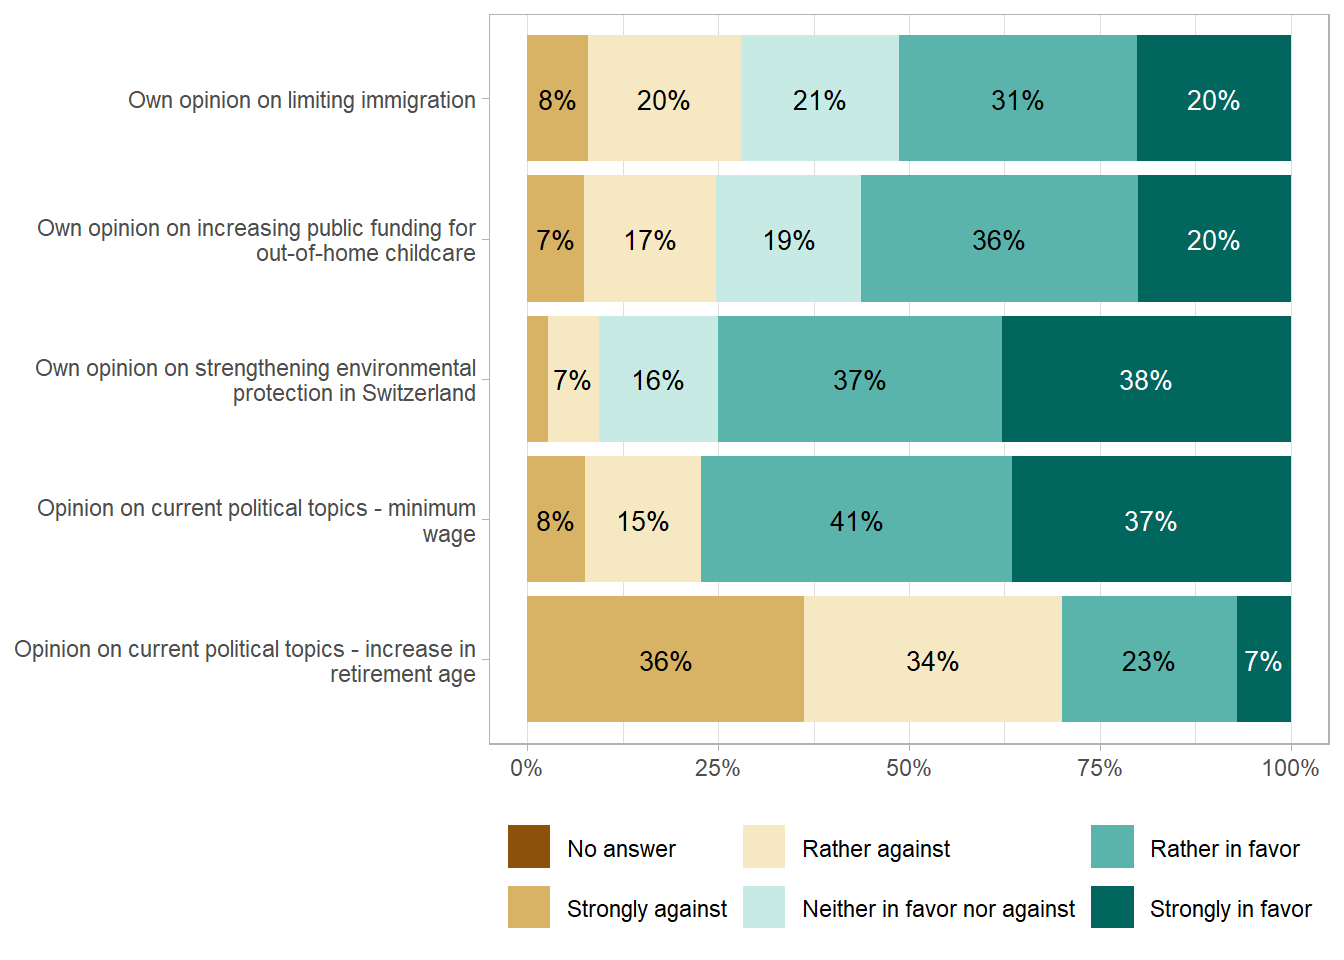

In [ ]:
likert1

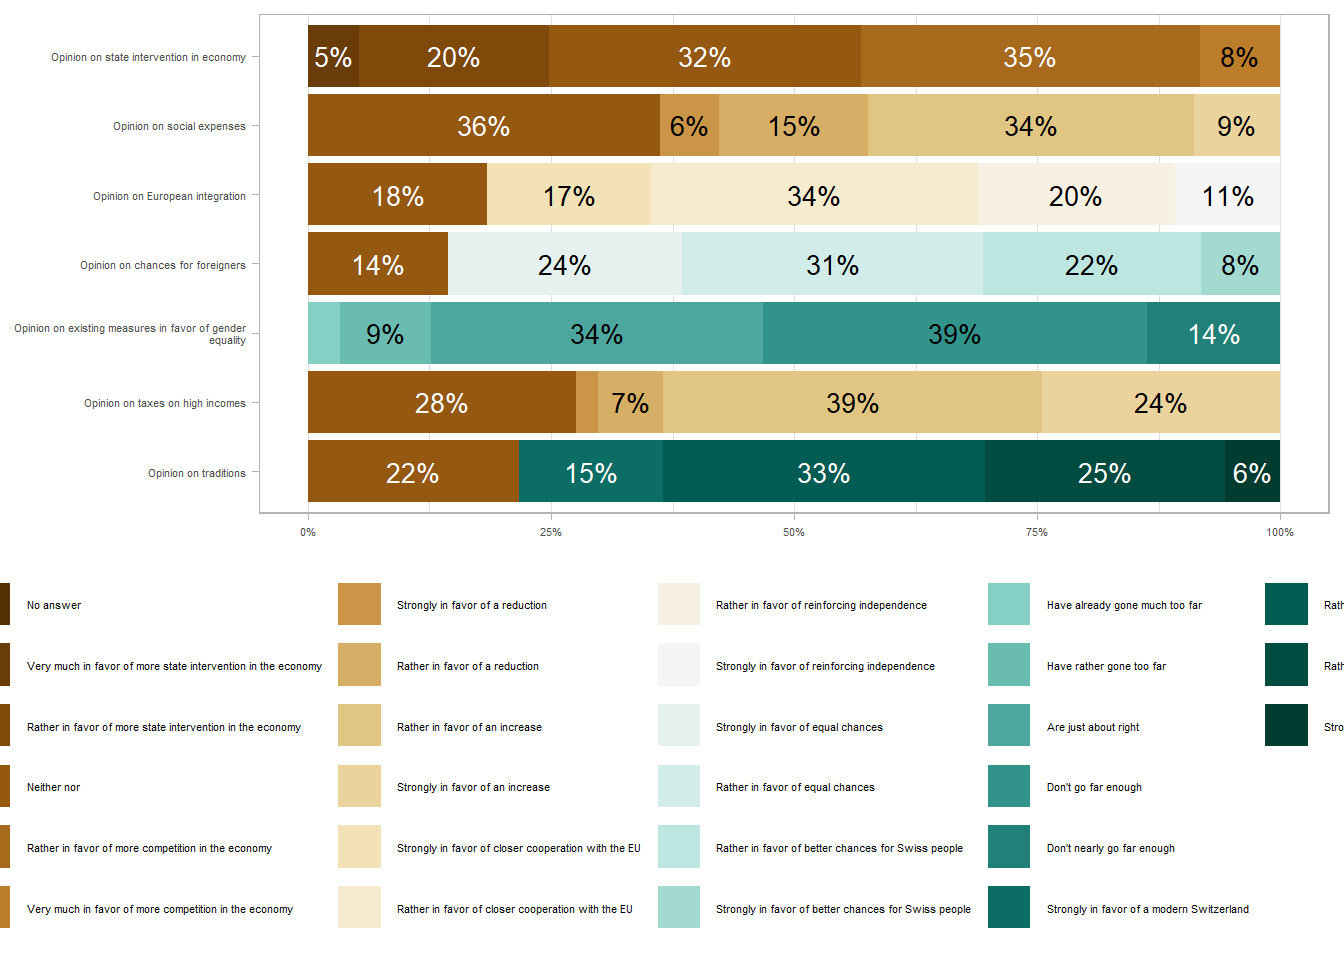

In [ ]:
likert2

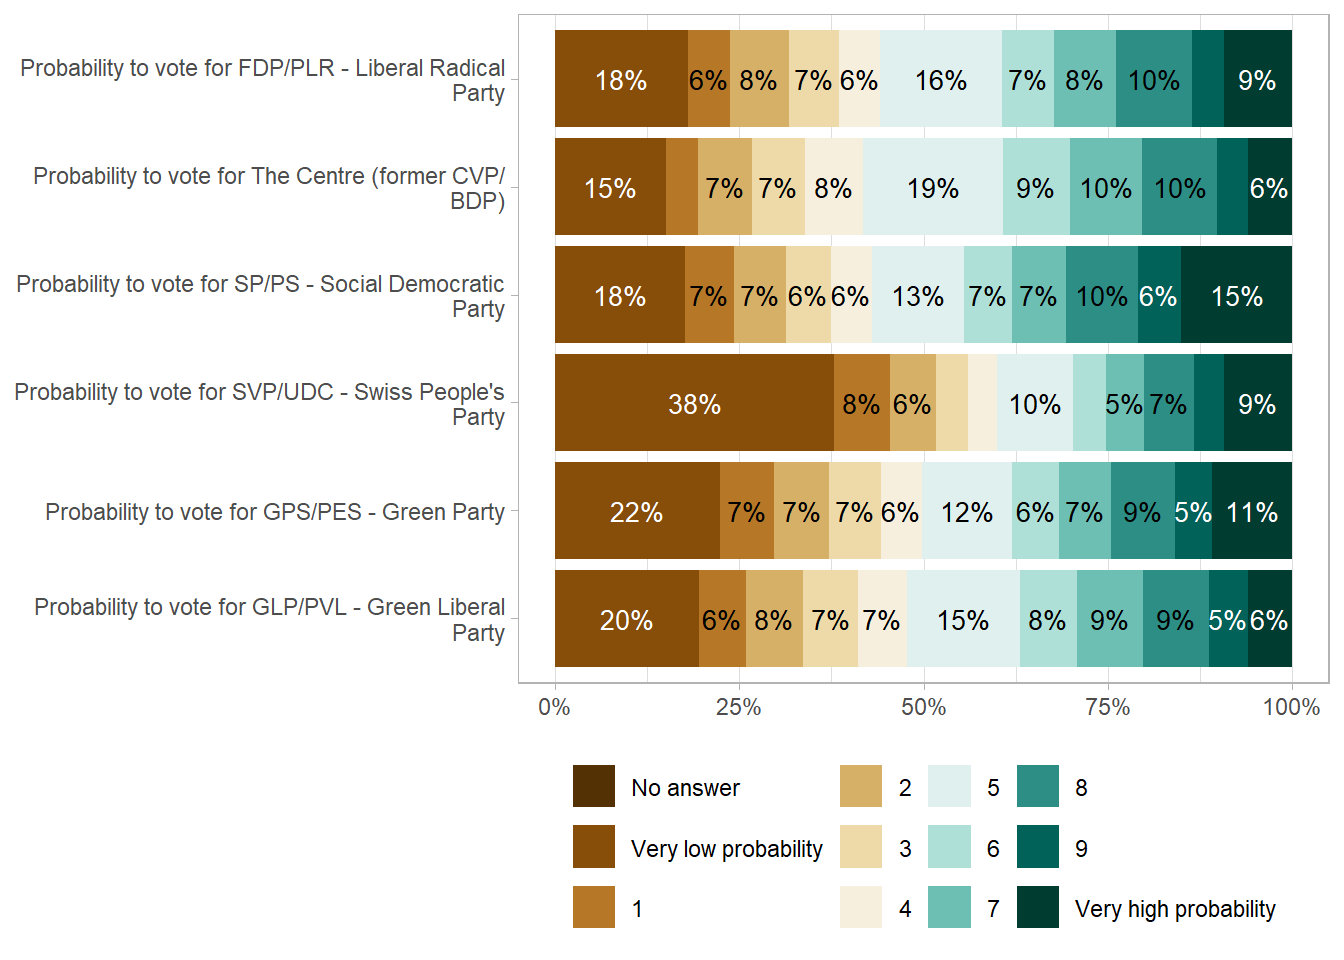

In [ ]:
likert3

  ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                           Unique           Missing   Mean   SD     Min    Median   Max    Histogram
                                            Pct.                                           
  ------------------------ ---------------- --------- ------ ------ ------ -------- ------ -----------------------------------------------------------------------------------------------------------------------
  yes_premium_initiative   3                56        0.4    0.5    0.0    0.0      1.0    ![](C:\Users\celal\Documents\GitHub\annexe-assurance-maladie\tinytable_assets\tinytable_1_id8cgscbomivcxf02e03er.png)

  education_ISCED          8                40        4.9    1.6    1.0    5.0      7.0    ![](C:\Users\celal\Documents\GitHub\annexe-assurance-maladie\tinytable_assets\tinytable_2_idbz0n4a6a3a0jq3du1tny.png)

  Left-right               12               42        5.2    2.5    0.0    5.0      10.0   ![](C:\Users\celal\Documents\GitHub\annexe-assurance-maladie\tinytable_assets\tinytable_3_idshzjudmwhaneaia1nos5.png)
  self-placement                                                                           

  Age in years             76               40        54.3   17.3   19.0   57.0     94.0   ![](C:\Users\celal\Documents\GitHub\annexe-assurance-maladie\tinytable_assets\tinytable_4_idg598tkf4qgmufdfwr26s.png)

                                            N         \%                                   

  eseg10                   Business and     328       4.0                                  
                           administration                                                  
                           professionals                                                   

                           Clerks and       565       6.9                                  
                           skilled service                                                 
                           employees                                                       

                           Lower status     297       3.6                                  
                           employees                                                       

                           Managers         783       9.6                                  

                           Professionals    1568      19.1                                 

                           Retired          1392      17.0                                 

                           Skilled          279       3.4                                  
                           industrial                                                      
                           employees                                                       

                           small            168       2.0                                  
                           entrepreneurs                                                   

                           Student          193       2.4                                  

                           Technicians and  784       9.6                                  
                           associated                                                      
                           professionals                                                   
                           employees                                                       

                           Unemployed or    212       2.6                                  
                           disabled                                                        

  vote_choice              FDP/PLR -        685       8.4                                  
                           Liberal Radical                                                 
                           Party                                                           

                           The Centre       705       8.6                                  
                           (former CVP/                                                    
                           BDP)                                                            

                           SP/PS - Social   1095      13.4                                 
                           Democratic Party                                                

                           SVP/UDC - Swiss  874       10.7                                 
                           People's Party                                                  

                           GPS/PES - Green  362       4.4                                  
                           Party                                                           

                           GLP/PVL - Green  437       5.3                                  
                           Liberal Party                                                   

                           Other party,     239       2.9                                  
                           several/all                                                     
                           parties                                                         

  gender                   Male             2605      31.8                                 

                           Female           2292      28.0                                 

  language                 German           3628      44.3                                 

                           French           1079      13.2                                 

                           Italian          212       2.6                                  

  Vote choice: Premium     No answer        0         0.0                                  
  Relief Initiative                                                                        

                           Yes (accepted)   1505      18.4                                 

                           No (rejected)    1231      15.0                                 

                           Blank            63        0.8                                  

                           Don't remember   809       9.9                                  
  ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


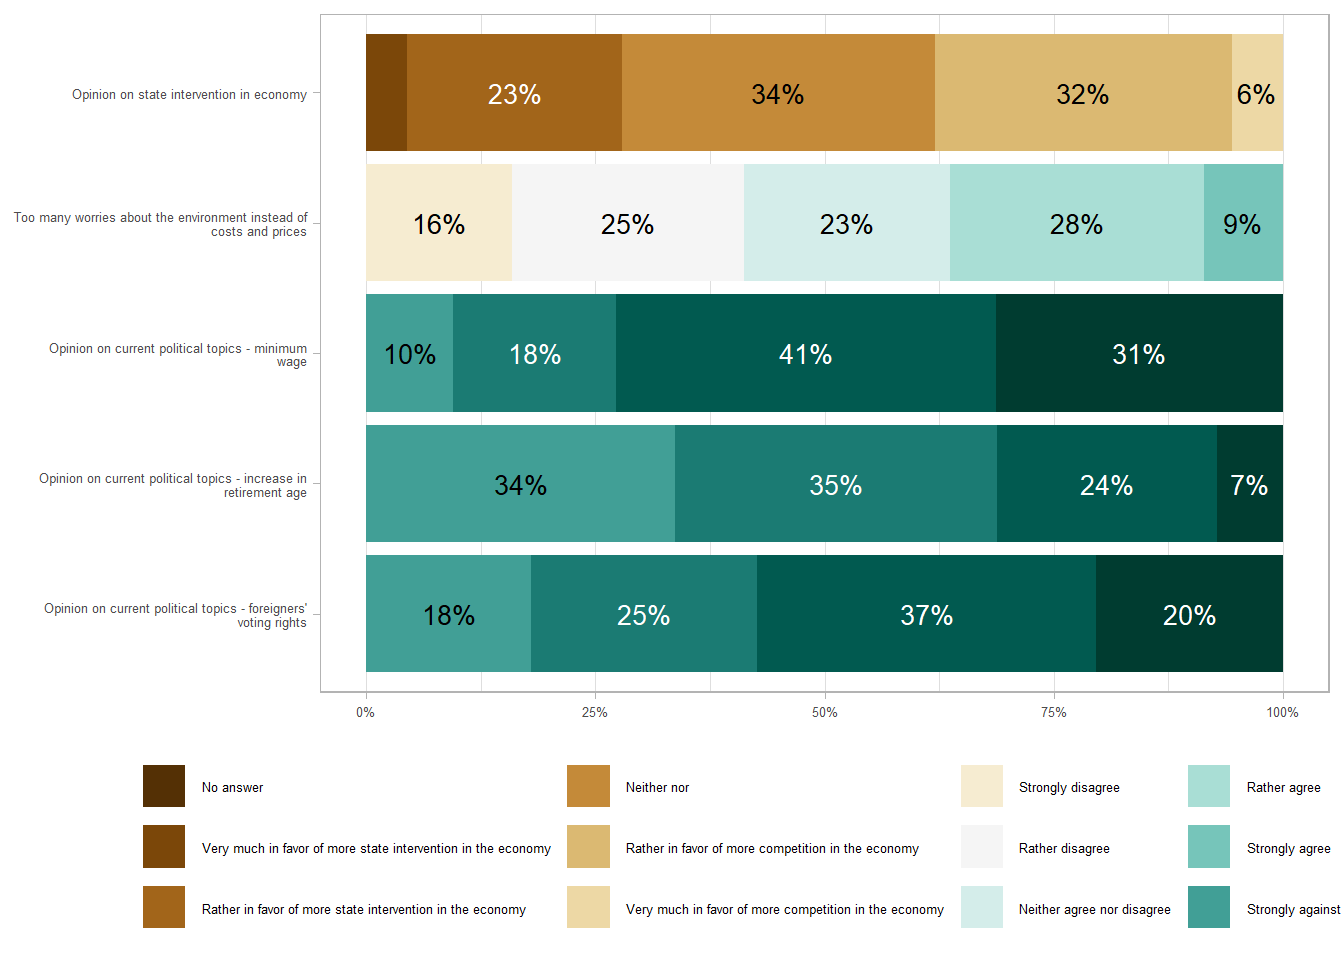

In [ ]:
#| label: tbl-descriptivemodel2
#| tbl-cap: "Statistiques descriptives: Panel Selects vague 4."
#| message: false
#| warning: false

selects2023panelW4_2 %>% 
  dplyr::select(yes_premium_initiative, eseg10, education_ISCED, lr, vote_choice, gender, W4_age, language, W4_f10771a) %>% 
  mutate(across(starts_with("W4_f10771a"), as_label)) %>% 
  datasummary_skim(output = "markdown")

In [ ]:
library(modelsummary)
modelsummary(list("Augmentation franchise minimale" = model1_step2), stars = T)
modelsummary(list("Initiative pour l'allègement des primes" = best_model_glm2), stars = T)

<!-- preamble start -->

 

 

 
 
 
 
 
 
 
 
 Augmentation franchise minimale 
 
 
 + p < 0.1, * p < 0.05, ** p < 0.01, *** p < 0.001 
 
 
 (Intercept) 
 0.027 
 
 
 
 (0.310) 
 
 
 income_adj_decile 
 -0.033*** 
 
 
 
 (0.010) 
 
 
 op_limit_immigration 
 -0.082** 
 
 
 
 (0.030) 
 
 
 op_protec_env 
 -0.122*** 
 
 
 
 (0.035) 
 
 
 op_social_expenses 
 0.155*** 
 
 
 
 (0.034) 
 
 
 op_eu_integration 
 0.074** 
 
 
 
 (0.027) 
 
 
 op_chances_foreigners 
 0.036 
 
 
 
 (0.026) 
 
 
 op_gender_equality 
 0.066+ 
 
 
 
 (0.035) 
 
 
 op_taxes_high_income 
 -0.071* 
 
 
 
 (0.032) 
 
 
 op_min_wage 
 0.147*** 
 
 
 
 (0.034) 
 
 
 op_incr_retirementAge 
 -0.335*** 
 
 
 
 (0.031) 
 
 
 probs_vote_centre 
 -0.028** 
 
 
 
 (0.010) 
 
 
 probs_vote_ps 
 0.048*** 
 
 
 
 (0.012) 
 
 
 probs_vote_verts 
 -0.024+ 
 
 
 
 (0.014) 
 
 
 probs_vote_vertsliberaux 
 -0.036** 
 
 
 
 (0.011) 
 
 
 langueFrench 
 0.467*** 
 
 
 
 (0.069) 
 
 
 langueItalian 
 0.172 
 
 
 
 (0.154) 
 
 
 langueRomansh 
 0.004 
 
 
 
 (0.545) 
 
 
 W1_age 
 0.010*** 
 
 
 
 (0.002) 
 
 
 genderFemale 
 0.290*** 
 
 
 
 (0.057) 
 
 
 Num.Obs. 
 6280 
 
 
 AIC 
 7950.8 
 
 
 BIC 
 8085.7 
 
 
 Log.Lik. 
 -3955.407 
 
 
 F 
 30.731 
 
 
 RMSE 
 0.47 
 
 
 
 
<!-- hack to avoid NA insertion in last line -->

<!-- preamble start -->

 

 

 
 
 
 
 
 
 
 
 Initiative pour l'allègement des primes 
 
 
 + p < 0.1, * p < 0.05, ** p < 0.01, *** p < 0.001 
 
 
 (Intercept) 
 -1.112** 
 
 
 
 (0.425) 
 
 
 income_adj_decile 
 -0.124*** 
 
 
 
 (0.016) 
 
 
 I(eseg10 == "Retired")TRUE 
 0.553*** 
 
 
 
 (0.137) 
 
 
 lr 
 -0.076** 
 
 
 
 (0.027) 
 
 
 op_state_intervention 
 -0.266*** 
 
 
 
 (0.051) 
 
 
 op_2many_worries_abt_env_vs_prices 
 0.094* 
 
 
 
 (0.043) 
 
 
 op_min_wage 
 0.336*** 
 
 
 
 (0.053) 
 
 
 op_incr_retirement_age 
 -0.128* 
 
 
 
 (0.050) 
 
 
 op_foreigners_votingrights 
 0.163** 
 
 
 
 (0.052) 
 
 
 vote_choiceThe Centre (former CVP/ BDP) 
 -0.057 
 
 
 
 (0.163) 
 
 
 vote_choiceSP/PS - Social Democratic Party 
 0.806*** 
 
 
 
 (0.180) 
 
 
 vote_choiceSVP/UDC - Swiss People's Party 
 0.134 
 
 
 
 (0.160) 
 
 
 vote_choiceGPS/PES - Green Party 
 0.669** 
 
 
 
 (0.216) 
 
 
 vote_choiceGLP/PVL - Green Liberal Party 
 0.052 
 
 
 
 (0.196) 
 
 
 vote_choiceOther party, several/all parties 
 0.516* 
 
 
 
 (0.222) 
 
 
 genderFemale 
 -0.376*** 
 
 
 
 (0.088) 
 
 
 W4_age 
 0.013*** 
 
 
 
 (0.004) 
 
 
 languageFrench 
 0.504*** 
 
 
 
 (0.111) 
 
 
 languageItalian 
 0.929*** 
 
 
 
 (0.225) 
 
 
 Num.Obs. 
 2999 
 
 
 AIC 
 3370.0 
 
 
 BIC 
 3484.1 
 
 
 Log.Lik. 
 -1666.006 
 
 
 F 
 30.126 
 
 
 RMSE 
 0.43 
 
 
 
 
<!-- hack to avoid NA insertion in last line -->

In [ ]:
library(sjPlot)
library(lme4)
library(gt)
library(gtsummary)
library(modelsummary)


glmer_canton_franchise = glmer(data = selects2023panel2,
                               contre_augm_franch_min ~ 1 + (1|canton),
                               family = binomial(link = "logit"))

glmer_canton_primes = glmer(data = selects2023panelW4_2,
                               yes_premium_initiative ~ 1 + (1|canton),
                            family = binomial(link = "logit"))

In [ ]:
modelsummary(models = list("Augmentation franchise minimale" = glmer_canton_primes, "Initiative pour l'allègement des primes" = glmer_canton_franchise), output = "markdown")

  ----------------------------------------------------------------------
                   Augmentation franchise  Initiative pour l'allègement
                   minimale                des primes
  ---------------- ----------------------- -----------------------------
  (Intercept)      -0.301                  0.327

                   (0.090)                 (0.067)

  SD (Intercept    0.377                   0.294
  canton)                                  

  Num.Obs.         3608                    8110

  R2 Marg.         0.000                   0.000

  R2 Cond.         0.041                   0.026

  AIC              4848.6                  10964.8

  BIC              4861.0                  10978.8

  ICC              0.0                     0.0

  RMSE             0.49                    0.49
  ----------------------------------------------------------------------


In [ ]:
glm_eseg_franchise = glm(data = selects2023panel2,
                               contre_augm_franch_min ~ eseg10,
                               family = binomial(link = "logit"))

glm_eseg_primes = glm(data = selects2023panelW4_2,
                               yes_premium_initiative ~ eseg10,
                            family = binomial(link = "logit"))

modelsummary(list("Augmentation franchise minimale" = glm_eseg_franchise, "Initiative pour l'allègement des primes" = glm_eseg_primes), stars = T, output = "markdown")

+------------------------------+-----------------+---------------------+
|                              | Augmentation    | Initiative pour     |
|                              | franchise       | l'allègement des    |
|                              | minimale        | primes              |
+==============================+=================+=====================+
| (Intercept)                  | -0.052          | -0.984\*\*\*        |
+------------------------------+-----------------+---------------------+
|                              | (0.114)         | (0.179)             |
+------------------------------+-----------------+---------------------+
| eseg10Clerks and skilled     | 0.462\*\*       | 0.452\*             |
| service employees            |                 |                     |
+------------------------------+-----------------+---------------------+
|                              | (0.143)         | (0.229)             |
+------------------------------+-----------------+---------------------+
| eseg10Lower status employees | 0.452\*\*       | 0.609\*             |
+------------------------------+-----------------+---------------------+
|                              | (0.166)         | (0.265)             |
+------------------------------+-----------------+---------------------+
| eseg10Managers               | 0.092           | 0.094               |
+------------------------------+-----------------+---------------------+
|                              | (0.134)         | (0.215)             |
+------------------------------+-----------------+---------------------+
| eseg10Professionals          | 0.293\*         | 0.454\*             |
+------------------------------+-----------------+---------------------+
|                              | (0.125)         | (0.195)             |
+------------------------------+-----------------+---------------------+
| eseg10Retired                | 0.505\*\*\*     | 1.131\*\*\*         |
+------------------------------+-----------------+---------------------+
|                              | (0.124)         | (0.188)             |
+------------------------------+-----------------+---------------------+
| eseg10Skilled industrial     | 0.589\*\*\*     | 0.485+              |
| employees                    |                 |                     |
+------------------------------+-----------------+---------------------+
|                              | (0.168)         | (0.281)             |
+------------------------------+-----------------+---------------------+
| eseg10small entrepreneurs    | 0.369+          | 0.504               |
+------------------------------+-----------------+---------------------+
|                              | (0.197)         | (0.307)             |
+------------------------------+-----------------+---------------------+
| eseg10Student                | 0.160           | 0.449+              |
+------------------------------+-----------------+---------------------+
|                              | (0.142)         | (0.266)             |
+------------------------------+-----------------+---------------------+
| eseg10Technicians and        | 0.391\*\*       | 0.436\*             |
| associated professionals     |                 |                     |
| employees                    |                 |                     |
+------------------------------+-----------------+---------------------+
|                              | (0.135)         | (0.216)             |
+------------------------------+-----------------+---------------------+
| eseg10Unemployed or disabled | 0.573\*\*\*     | 0.548\*             |
+------------------------------+-----------------+---------------------+
|                              | (0.149)         | (0.249)             |
+------------------------------+-----------------+---------------------+
| Num.Obs.                     | 7535            | 3392                |
+------------------------------+-----------------+---------------------+
| AIC                          | 10241.2         | 4511.7              |
+------------------------------+-----------------+---------------------+
| BIC                          | 10317.4         | 4579.2              |
+------------------------------+-----------------+---------------------+
| Log.Lik.                     | -5109.620       | -2244.872           |
+------------------------------+-----------------+---------------------+
| RMSE                         | 0.49            | 0.48                |
+------------------------------+-----------------+---------------------+
| -   p \< 0.1, \* p \< 0.05,  |                 |                     |
|     \*\* p \< 0.01, \*\*\* p |                 |                     |
|     \< 0.001                 |                 |                     |
+------------------------------+-----------------+---------------------+


For confidence bands, please install `qqplotr`.

Ignoring unknown labels:
• size : ""
• alpha : ""

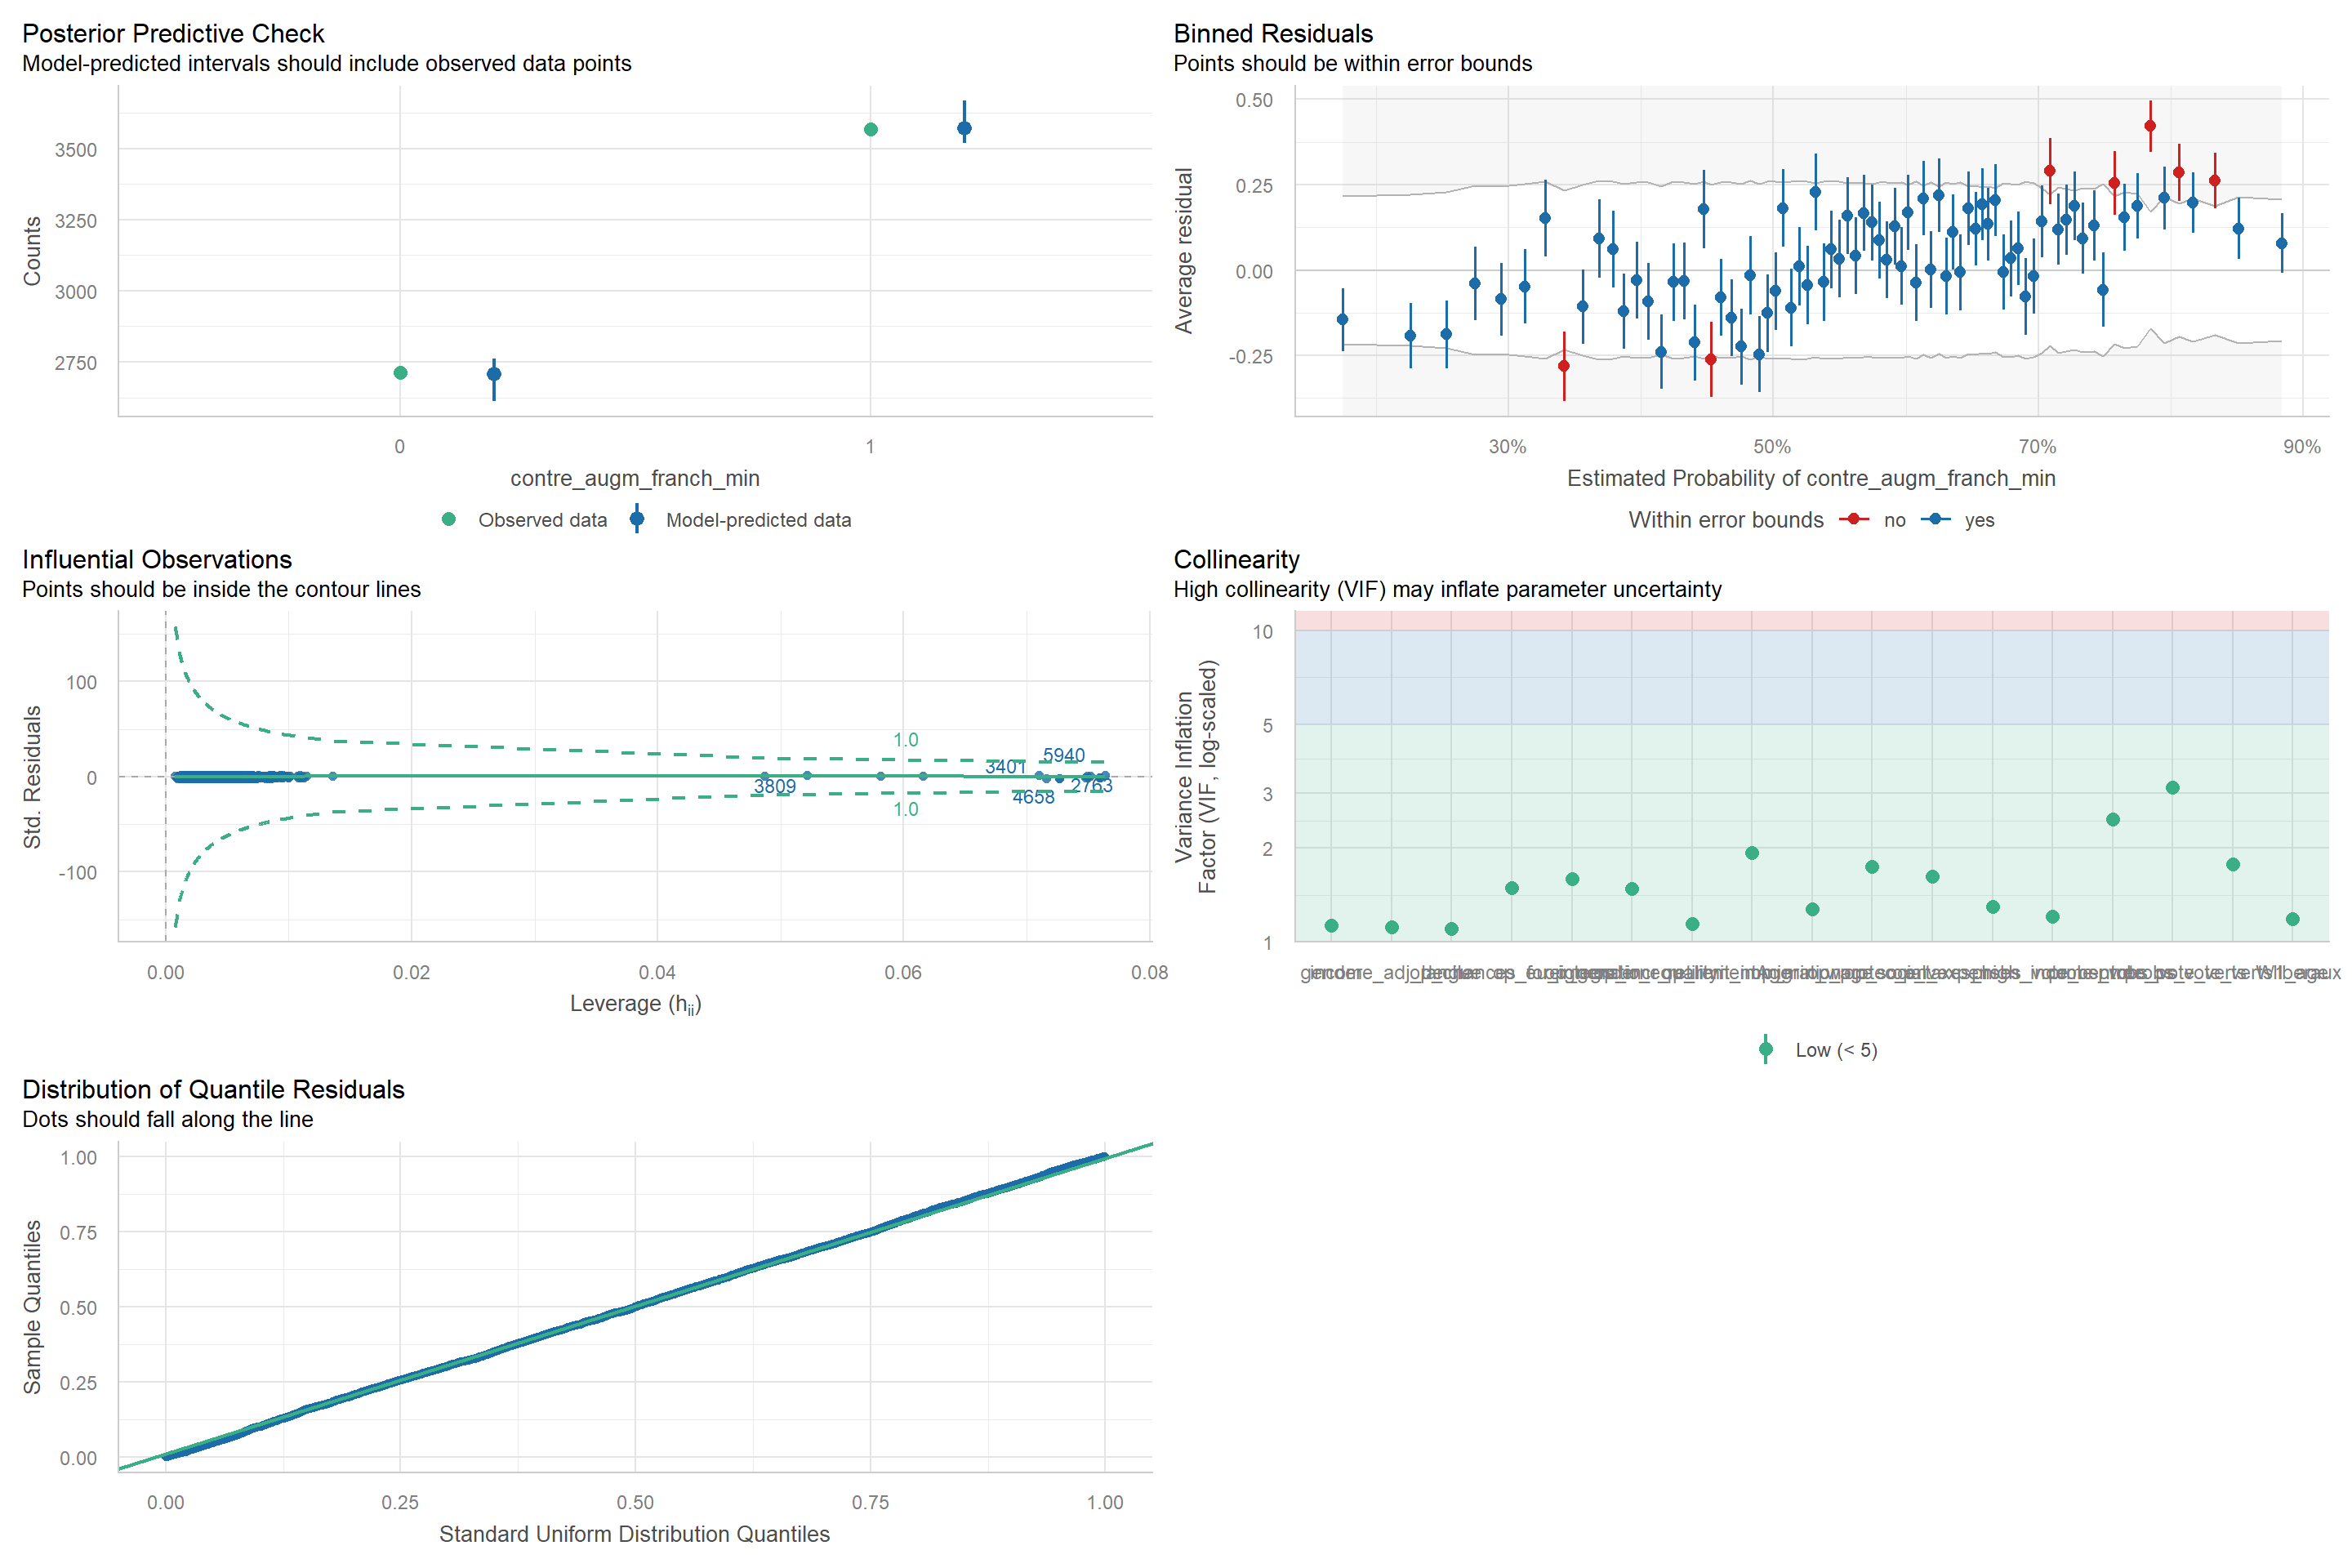

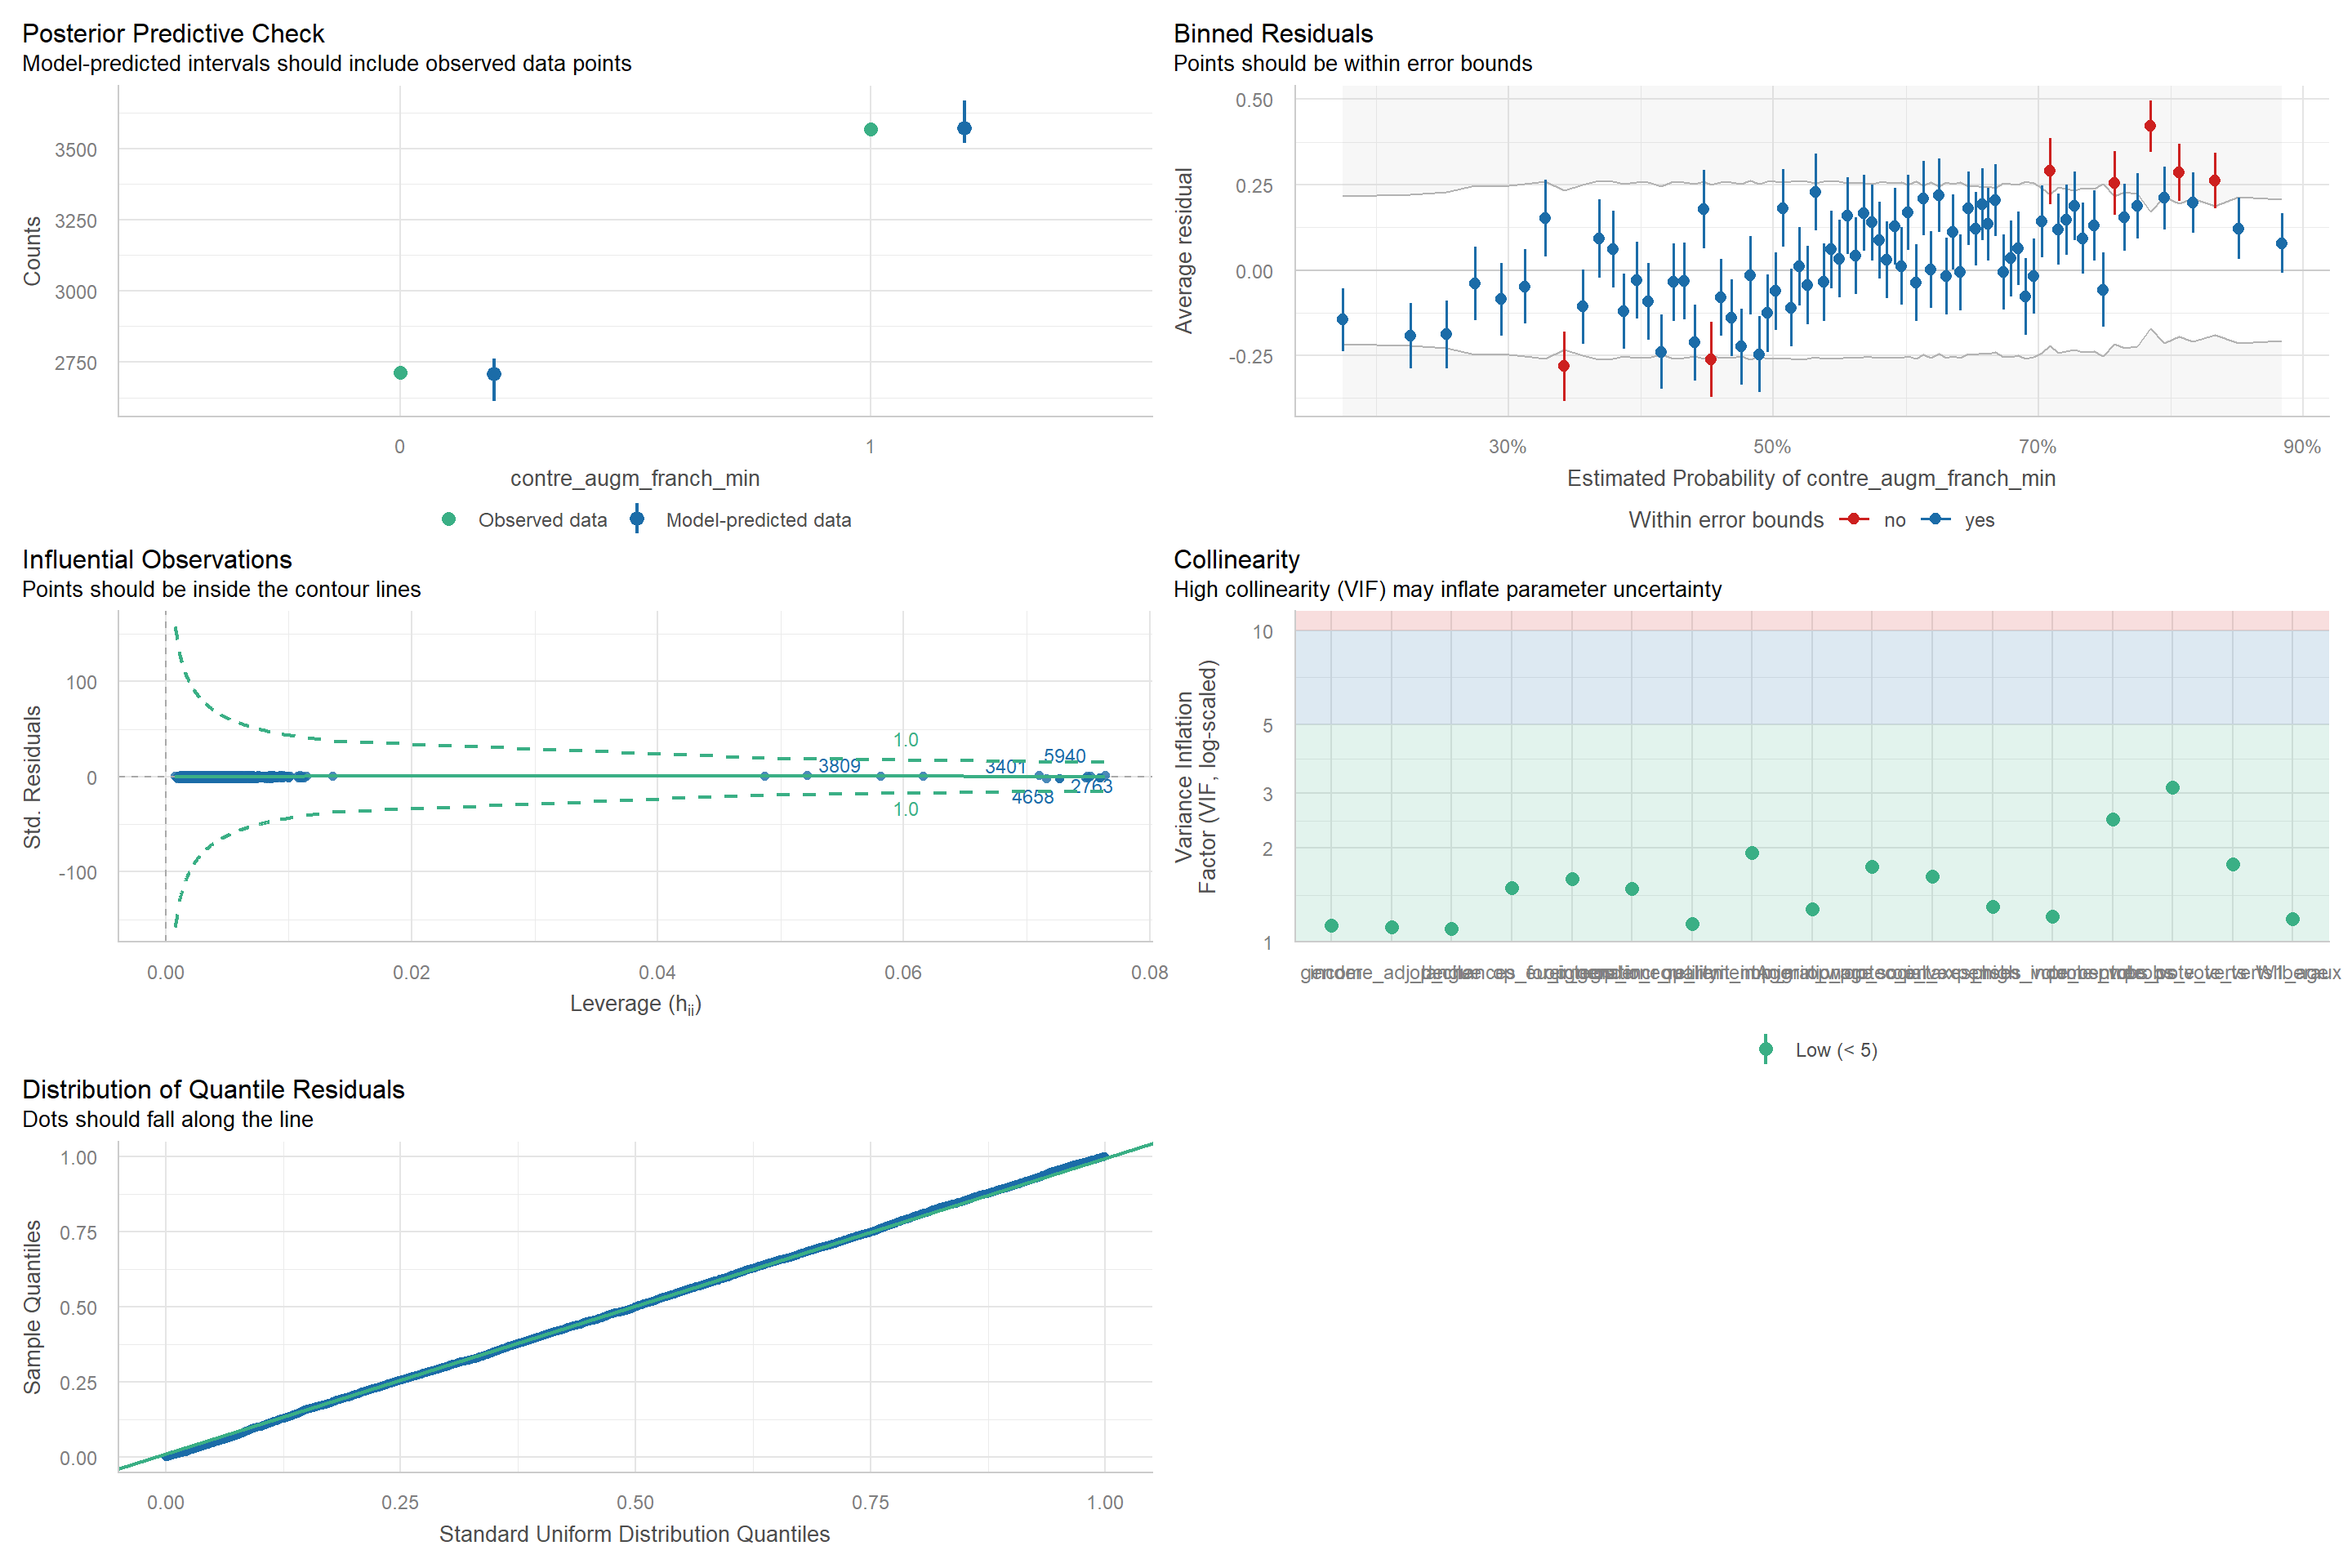

In [ ]:
library(performance)
library(ggplotify)

For confidence bands, please install `qqplotr`.

Ignoring unknown labels:
• size : ""
• alpha : ""

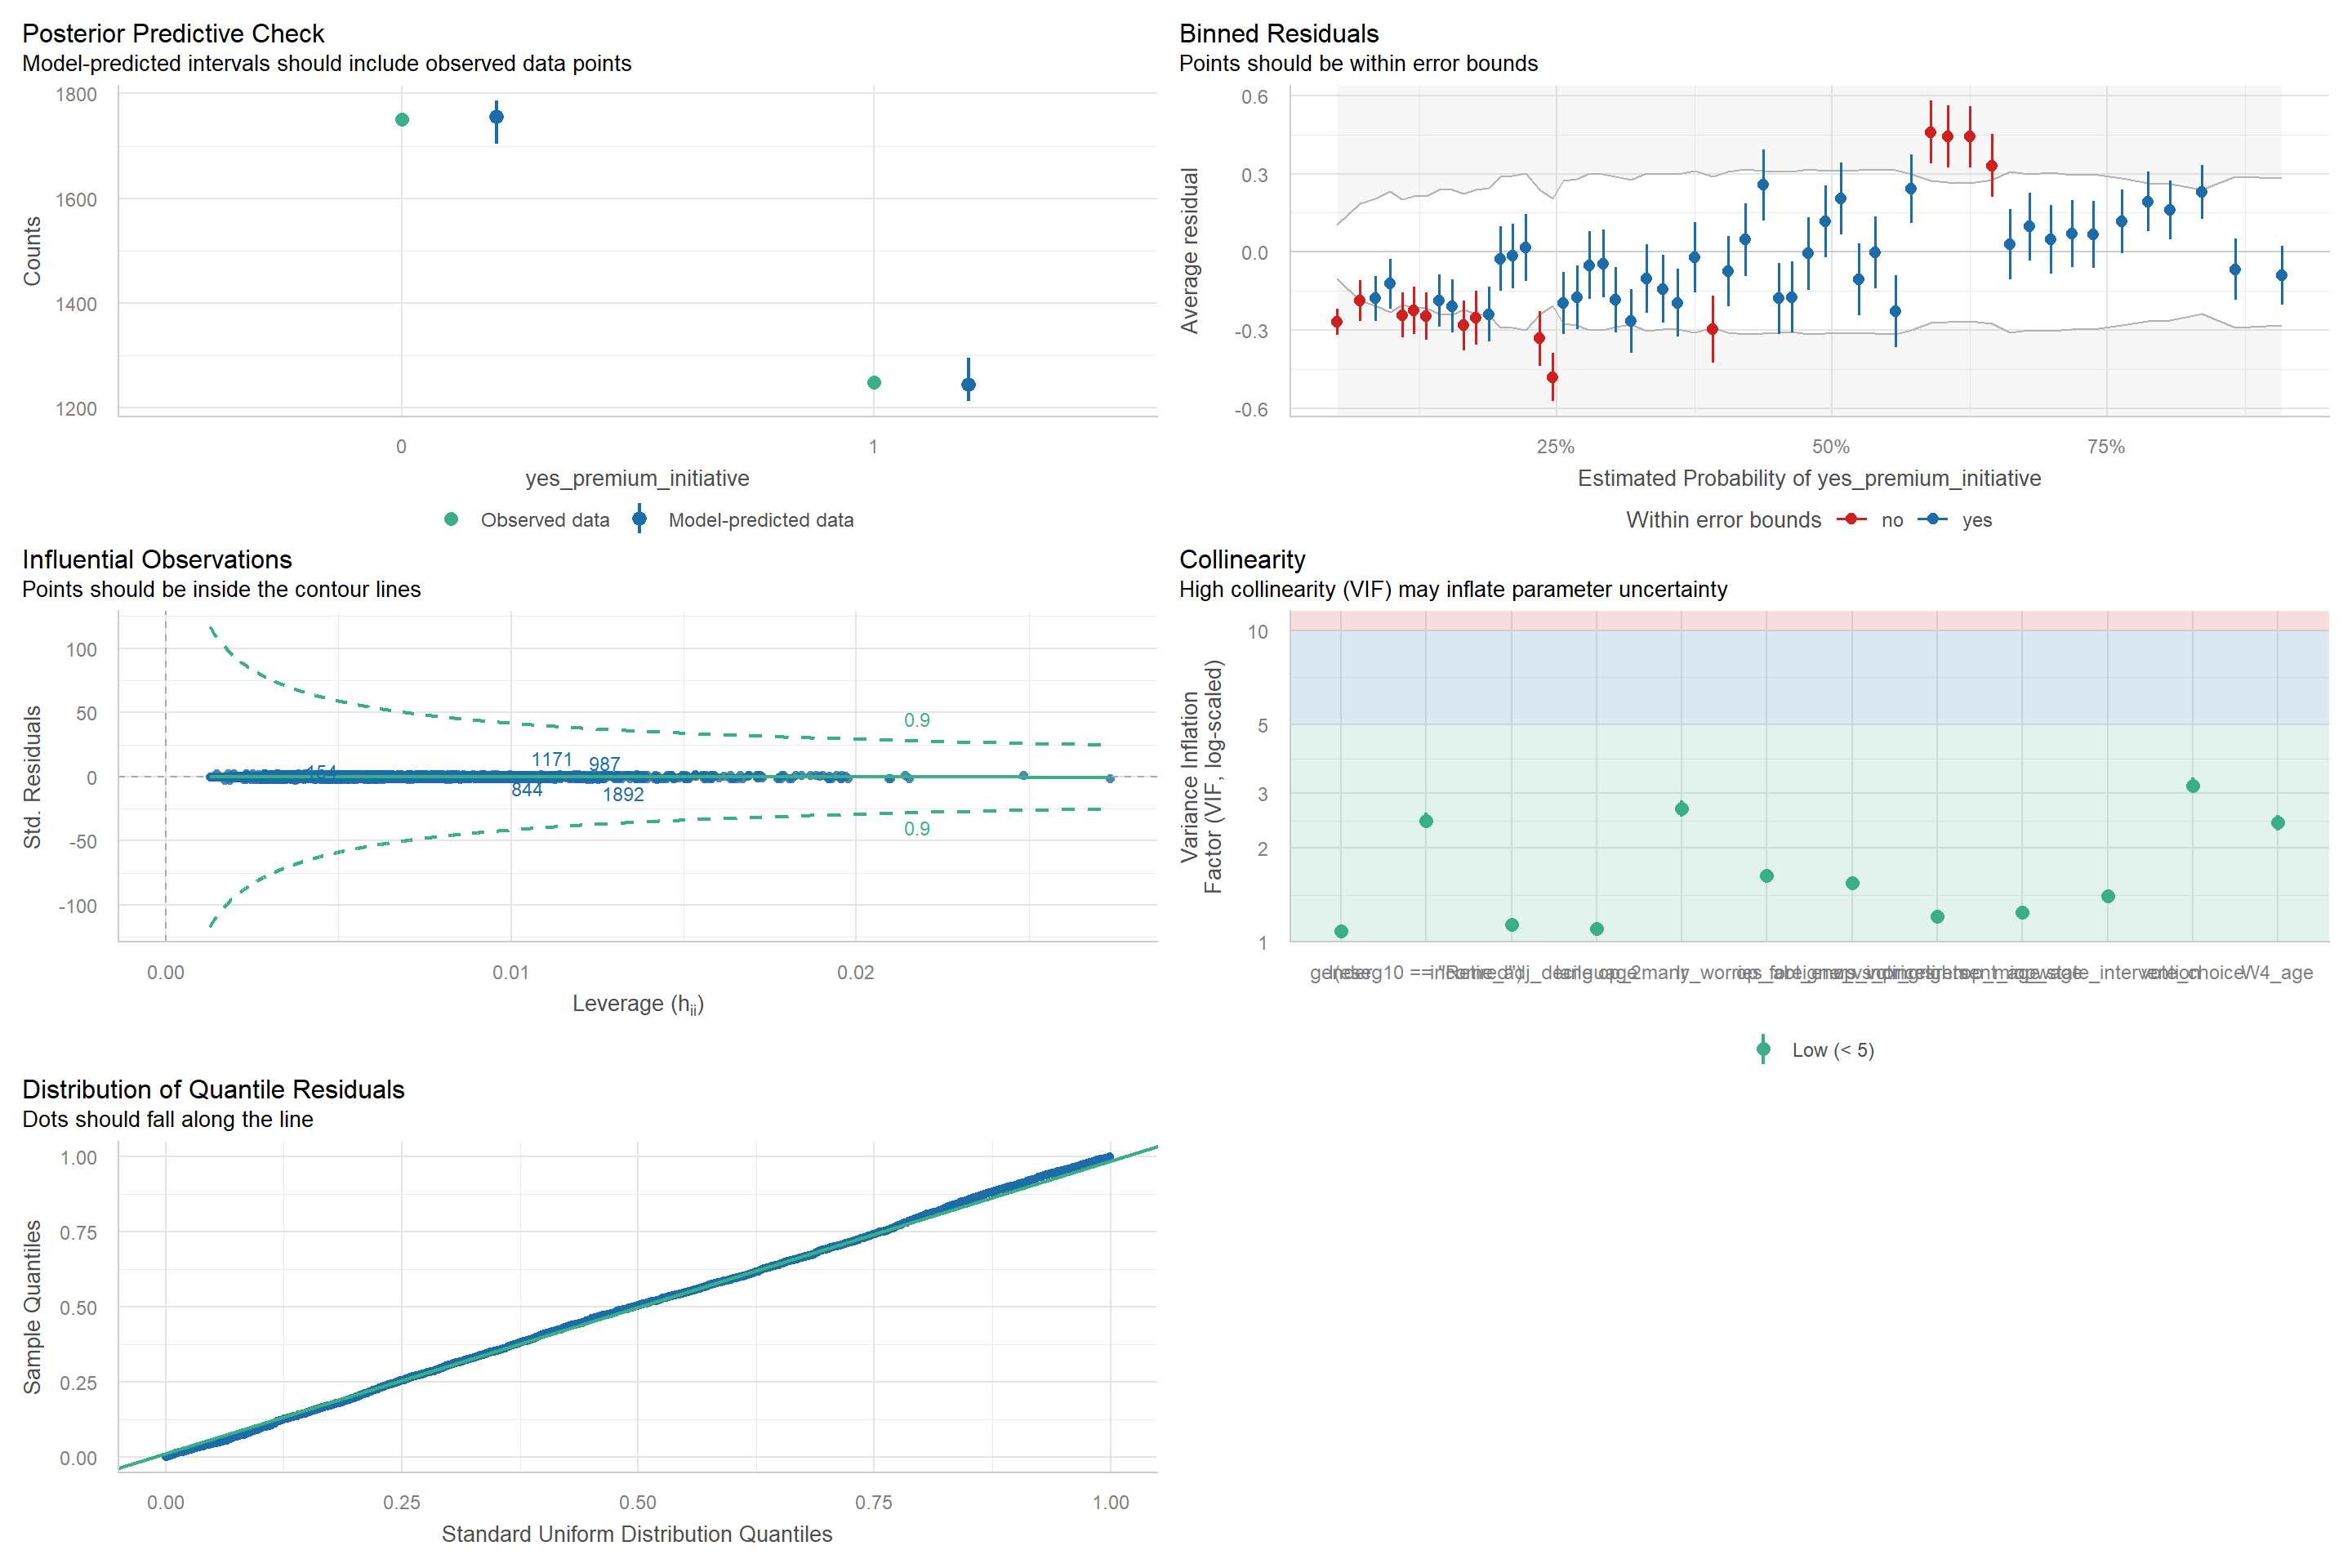

In [ ]:
checkmodel2 <- 
check_model(best_model_glm2)

plot = plot(checkmodel2)